In [4]:
import numpy as np
import torch
meanA = [-0.5, -0.5]
covA = [[1, 0.25], [0.25, 1]]
samplesA = np.random.multivariate_normal(meanA, covA, 1000)

meanB = [0.5, 0.5]
covB = [[1, 0.25], [0.25, 1]]
samplesB = np.random.multivariate_normal(meanB, covB, 1000)

array([[0.76794907, 1.57084217],
       [0.80319233, 0.42701955],
       [1.72287513, 0.77852886],
       ...,
       [0.26643747, 0.71372088],
       [1.41766436, 1.7700629 ],
       [0.83025428, 0.1838261 ]])

In [5]:
import numpy as np

tensor = np.concatenate((samplesA,samplesB), axis=0)

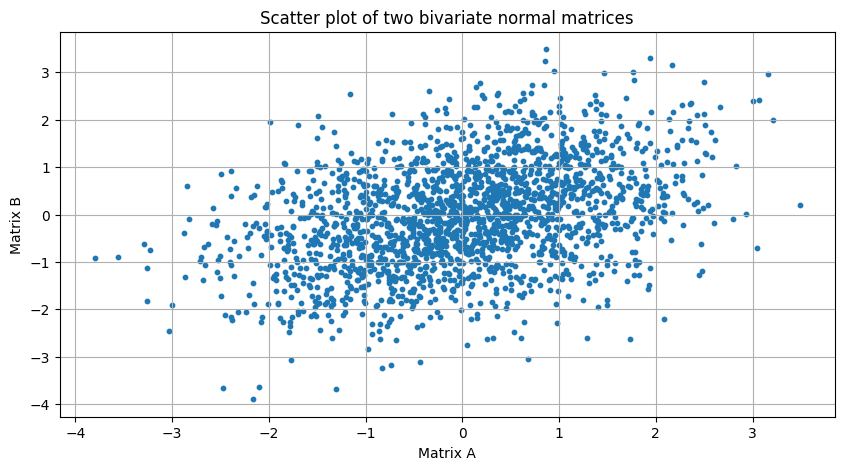

Tensor Size:  (2000, 2)


In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(tensor[:,0],tensor[:,1], [10])
plt.title('Scatter plot of two bivariate normal matrices')
plt.xlabel('Matrix A')
plt.ylabel('Matrix B')
plt.grid(True)
plt.show()

print("Tensor Size: ", tensor.shape)

/tmp/ipykernel_2444/1620438003.py:7: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  dist.append(torch.sqrt((ten[i]-centroids[0]) ** 2).sum(axis=0))
/tmp/ipykernel_2444/1620438003.py:8: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  dist.append(torch.sqrt((ten[i]-centroids[1]) ** 2).sum(axis=0))


[[ 0.69096195  0.81590844]
 [-0.60846289 -0.80488139]]


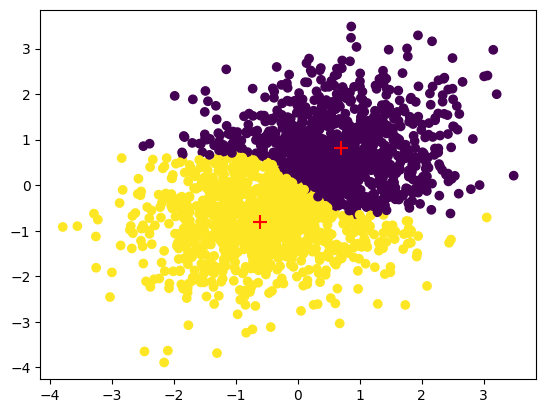

In [8]:
ten = torch.tensor(tensor)
centroids = tensor[torch.randperm(ten.size(0))[:2]]
for x in range(100):
  distances = []
  for i in range(ten.size()[0]):
    dist = []
    dist.append(torch.sqrt((ten[i]-centroids[0]) ** 2).sum(axis=0))
    dist.append(torch.sqrt((ten[i]-centroids[1]) ** 2).sum(axis=0))
    distances.append(dist)

  x, labels = torch.min(torch.tensor(distances), dim=1)
  sum0x = 0
  sum0y = 0
  count0 = 0
  sum1x = 0
  sum1y = 0
  count1 = 0
  for i in range(ten.size()[0]):
    if labels[i] == 0:
      count0+=1
      sum0x += ten[i][0]
      sum0y += ten[i][1]
    if labels[i] == 1:
      count1+=1
      sum1x += ten[i][0]
      sum1y += ten[i][1]
  centroids[0][0] = sum0x/count0
  centroids[0][1] = sum0y/count0
  centroids[1][0] = sum1x/count1
  centroids[1][1] = sum1y/count1
print(centroids)

plt.scatter(tensor[:,0],tensor[:,1], c=labels.numpy())
plt.scatter(centroids[:,0],centroids[:,1], marker='+', s=100, color='red')
plt.show()

In [9]:
import torch
ten = ten - torch.mean(ten)
cov_matrix = sum([torch.reshape(ten[i],(-1,1)) @ torch.reshape(ten[i],(1,-1)) for i in range(2000)]) / 2000
_ ,eigvec = torch.linalg.eig(cov_matrix)
eigvec = eigvec.real
order = torch.argsort(eigvec[0],descending=True)
print(eigvec)

tensor([[ 0.7228, -0.6911],
        [ 0.6911,  0.7228]], dtype=torch.float64)
